# Taller 2: Interpolación
Este notebook contiene las soluciones a los ejercicios de interpolación del Taller 2.

## Ejercicio 1: Interpolación de Newton
Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio
de interpolación de Newton de grado n. Grafique el polinomio de interpolación junto con los
datos experimentales aportados en el archivo 'Datos Taller 2.txt' en el rango [0, 6].

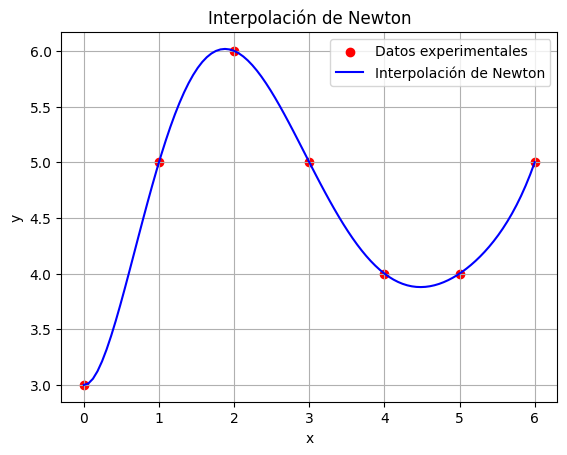

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def newton_coefficients(x, y):
    """Calcula los coeficientes del polinomio de interpolación de Newton."""
    n = len(x)
    coef = np.copy(y).astype(float)
    
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            coef[i] = (coef[i] - coef[i - 1]) / (x[i] - x[i - j])
    
    return coef

def newton_polynomial(x_vals, x_data, coef):
    """Evalúa el polinomio de Newton en los puntos x_vals."""
    n = len(coef) - 1
    p = coef[n]
    for k in range(n - 1, -1, -1):
        p = p * (x_vals - x_data[k]) + coef[k]
    return p

# Datos del archivo "Datos Taller 2.txt"
x_data = np.array([0, 1, 2, 3, 4, 5, 6])
y_data = np.array([3, 5, 6, 5, 4, 4, 5])

# Calcular coeficientes del polinomio de Newton
coefficients = newton_coefficients(x_data, y_data)

# Crear valores para graficar el polinomio en el rango [0,6]
x_vals = np.linspace(0, 6, 100)
y_vals = newton_polynomial(x_vals, x_data, coefficients)

# Graficar los datos y el polinomio de interpolación
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_vals, y_vals, label='Interpolación de Newton', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Newton')
plt.legend()
plt.grid()
plt.show()


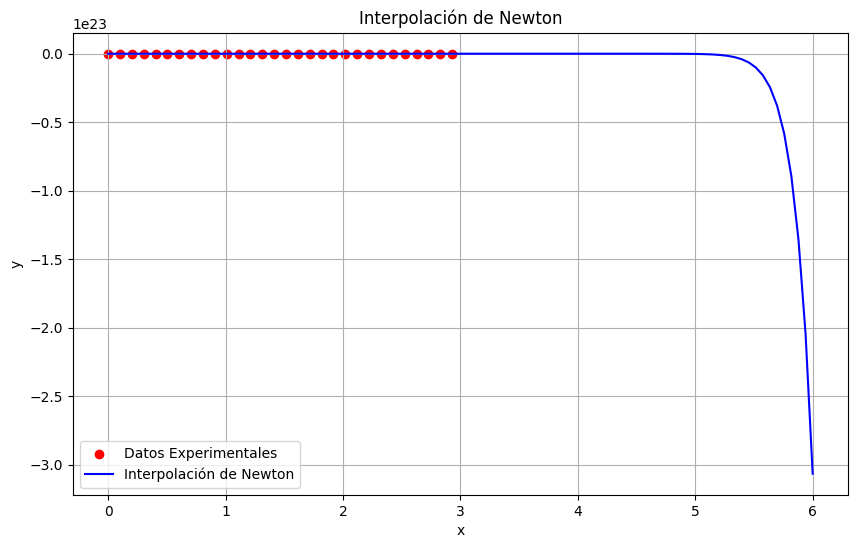

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    """Calcula la tabla de diferencias divididas de Newton."""
    n = len(y)
    coef = np.array(y, dtype=float)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j - 1]) / (x[j:] - x[j - 1])
    return coef

def newton_poly(x_eval, x, coef):
    """Evalúa el polinomio de interpolación de Newton."""
    n = len(coef)
    poly = coef[-1]
    for k in range(n - 2, -1, -1):
        poly = coef[k] + (x_eval - x[k]) * poly
    return poly

def load_data(filename):
    """Carga los datos desde un archivo con dos columnas."""
    data = np.loadtxt(filename)
    x, y = data[:, 0], data[:, 1]
    return x, y

def plot_interpolation(filename):
    """Genera el polinomio de Newton e interpola los datos del archivo."""
    x, y = load_data(filename)
    coef = divided_diff(x, y)
    
    x_eval = np.linspace(0, 6, 100)
    y_eval = [newton_poly(xi, x, coef) for xi in x_eval]
    
    plt.scatter(x, y, color='red', label='Datos experimentales')
    plt.plot(x_eval, y_eval, label='Interpolación de Newton', color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolación de Newton')
    plt.legend()
    plt.grid()
    plt.show()

# Ejecutar la interpolación con el archivo especificado
plot_interpolation("Datos_taller_2_B.txt")



## Ejercicio 2: Interpolación de Lagrange
Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio
de interpolación de Lagrange de grado n. Grafique el polinomio de interpolación junto con los
datos experimentales aportados en el archivo 'Datos Taller 2.txt' en el rango [0, 6].

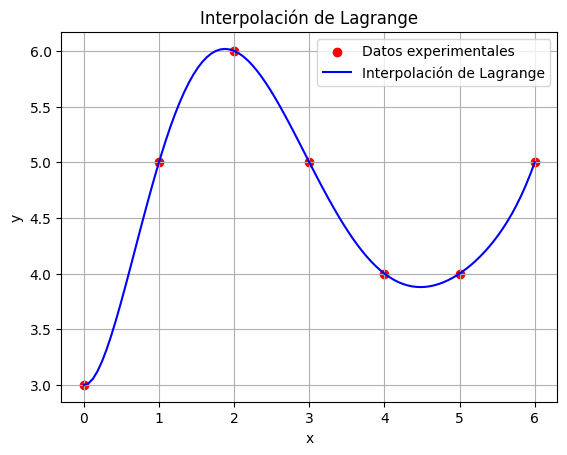

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x, x_data, k):
    """Calcula la base de Lagrange L_k(x)."""
    term = 1
    for i in range(len(x_data)):
        if i != k:
            term *= (x - x_data[i]) / (x_data[k] - x_data[i])
    return term

def lagrange_interpolation(x_vals, x_data, y_data):
    """Evalúa el polinomio de interpolación de Lagrange en los puntos x_vals."""
    y_vals = np.zeros_like(x_vals)
    for k in range(len(x_data)):
        y_vals += y_data[k] * lagrange_basis(x_vals, x_data, k)
    return y_vals

# Datos del archivo "Datos Taller 2.txt"
x_data = np.array([0, 1, 2, 3, 4, 5, 6])
y_data = np.array([3, 5, 6, 5, 4, 4, 5])

# Crear valores para graficar el polinomio en el rango [0,6]
x_vals = np.linspace(0, 6, 100)
y_vals = lagrange_interpolation(x_vals, x_data, y_data)

# Graficar los datos y el polinomio de interpolación
plt.scatter(x_data, y_data, color='red', label='Datos experimentales')
plt.plot(x_vals, y_vals, label='Interpolación de Lagrange', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.grid()
plt.show()


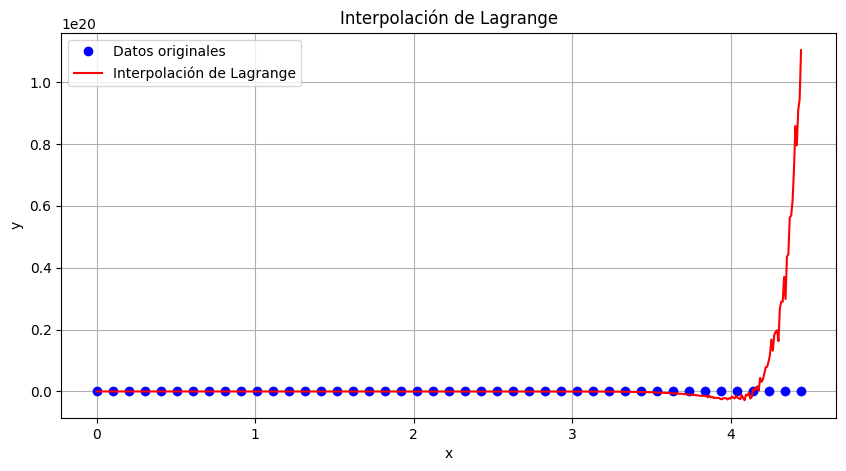

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Datos copiados y pegados como string
data = """0.000000000000000000e+00 -3.433125931320993307e-02
1.010101010101010083e-01 -4.099503090091331792e-02
2.020202020202020166e-01 8.270108326468499083e-02
3.030303030303030387e-01 -2.863973769975251479e-02
4.040404040404040331e-01 5.513459439916399557e-02
5.050505050505050830e-01 4.657237209244520504e-02
6.060606060606060774e-01 -4.926801378028661249e-02
7.070707070707070718e-01 -4.232688936553745396e-02  
8.080808080808080662e-01 4.584214358442119386e-03
9.090909090909090606e-01 2.766469204650679262e-02
1.010101010101010166e+00 7.739152944747548432e-03
1.111111111111111160e+00 -8.847403475866459296e-03
1.212121212121212155e+00 -7.451671837044221425e-02
1.313131313131313149e+00 7.441460340192123171e-03
1.414141414141414144e+00 1.466095829877841691e-02
1.515151515151515138e+00 -9.711069746523391666e-02
1.616161616161616132e+00 2.021039421636705580e-02
1.717171717171717127e+00 4.597773820388897925e-02
1.818181818181818121e+00 6.019127457424146982e-02
1.919191919191919116e+00 8.240130111962003234e-02
2.020202020202020332e+00 1.850024915524546842e-01
2.121212121212121104e+00 1.355191909672711637e-01
2.222222222222222321e+00 2.664706364139722283e-01
2.323232323232323093e+00 4.548352266511471731e-01
2.424242424242424310e+00 5.945877608744013498e-01
2.525252525252525082e+00 8.332615087932323528e-01
2.626262626262626299e+00 9.778232674263164226e-01
2.727272727272727071e+00 1.077774980615141320e+00
2.828282828282828287e+00 1.031476323725132094e+00
2.929292929292929060e+00 1.106717326359155873e+00
3.030303030303030276e+00 1.042143814718118344e+00
3.131313131313131048e+00 1.019755658491164452e+00
3.232323232323232265e+00 7.771766966466969739e-01
3.333333333333333481e+00 7.051677554552733262e-01
3.434343434343434254e+00 6.931701024725305249e-01
3.535353535353535470e+00 6.133084501623700113e-01
3.636363636363636243e+00 7.133414614016914124e-01
3.737373737373737459e+00 5.716857859768579297e-01
3.838383838383838231e+00 6.402526259169851741e-01
3.939393939393939448e+00 7.241039668646013228e-01
4.040404040404040664e+00 7.667857071399478697e-01
4.141414141414140992e+00 7.694657032499150340e-01
4.242424242424242209e+00 8.362767017611896225e-01
4.343434343434343425e+00 1.016943605198813660e+00
4.444444444444444642e+00 9.452550353819239026e-01"""

# Convertir los datos en un array de numpy
lines = data.strip().split("\n")
x, y = zip(*[map(float, line.split()) for line in lines])
x = np.array(x)
y = np.array(y)

# Interpolación de Lagrange
polinomio = lagrange(x, y)

# Generar puntos para la gráfica
x_interp = np.linspace(min(x), max(x), 500)
y_interp = polinomio(x_interp)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'bo', label='Datos originales')
plt.plot(x_interp, y_interp, 'r-', label='Interpolación de Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación de Lagrange')
plt.legend()
plt.grid()
plt.show()



## Ejercicio 3: Interpolación con Splines Cúbicos

Cree una función en Python que a partir de un conjunto de n + 1 datos, calcule el polinomio  de interpolación a través de splines cúbicos. Grafique el polinomio de interpolación junto con los datos experimentales aportados en el archivo "Datos Taller 2.txt" en el rango [0, 6].


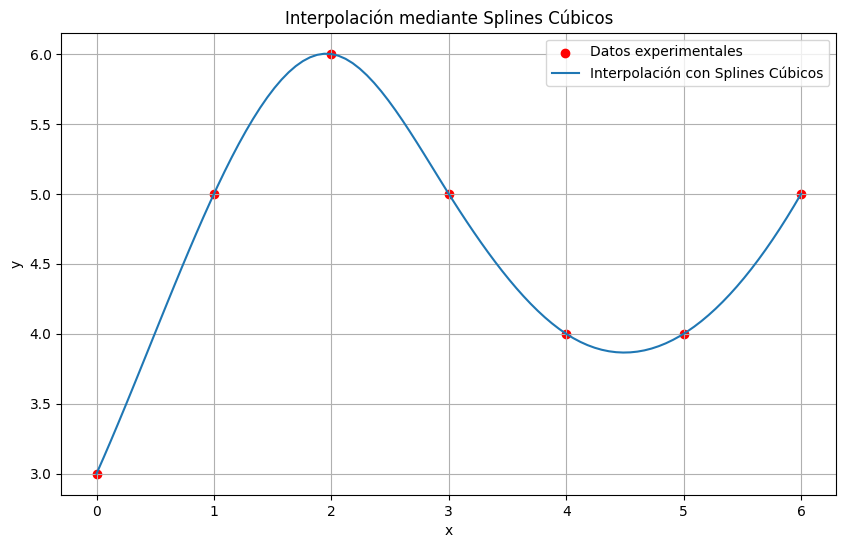

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def spline_interpolation(x, y, xi):
    spline = CubicSpline(x, y)
    return spline(xi)

# Datos Taller 2
x_datos_t2 = np.array([0, 1, 2, 3, 4, 5, 6])
y_datos_t2 = np.array([3, 5, 6, 5, 4, 4, 5])

# Rango de evaluación
xi = np.linspace(0, 6, 100)
yi_spline = spline_interpolation(x_datos_t2, y_datos_t2, xi)

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(x_datos_t2, y_datos_t2, color='red', label='Datos experimentales')
plt.plot(xi, yi_spline, label='Interpolación con Splines Cúbicos', linestyle='solid')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación mediante Splines Cúbicos')
plt.grid()
plt.show()
